# EDA

In [ ]:
Client: 
Jacob Phillips

Client Type:
Buyer       

Client Preferences:
Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf,
historic, no waterfront  


In [ ]:
1. Hypothese: 'Larger houses (in terms of square feet living area) are more expensive.'
2. Hypothese: 'Most houses are priced below the average price.'
3. Hypothese: 'The location of a house (in terms of zipcode) significantly affects its price.'

In [52]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Assuming your CSV file is named "your_file.csv"
file_path = 'data/eda.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

#data cleaning

df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)
df['view'].fillna(df['view'].mode()[0], inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

#missing data sqft_basement
df['sqft_basement'].fillna(df['sqft_basement'].median(), inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

#change values to int
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)

#sort columns 
df = df.reindex(['date','id', 'price', 'sqft_living', 'sqft_lot','yr_built', 'condition', 'grade', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'view', 'sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis=1)

df.head(10)

,date,id,price,sqft_living,sqft_lot,yr_built,condition,grade,bedrooms,bathrooms,...,waterfront,view,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,7129300520,221900.000,1180.000,5650.000,1955,3,7,3,1,...,0,0,1180.000,0.000,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,6414100192,538000.000,2570.000,7242.000,1951,3,7,3,2,...,0,0,2170.000,400.000,19910,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,5631500400,180000.000,770.000,10000.000,1933,3,6,2,1,...,0,0,770.000,0.000,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,2487200875,604000.000,1960.000,5000.000,1965,5,7,4,3,...,0,0,1050.000,910.000,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,1954400510,510000.000,1680.000,8080.000,1987,3,8,3,2,...,0,0,1680.000,0.000,0,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,7237550310,1230000.000,5420.000,101930.000,2001,3,11,4,4,...,0,0,3890.000,1530.000,0,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,1321400060,257500.000,1715.000,6819.000,1995,3,7,3,2,...,0,0,1715.000,0.000,0,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,2008000270,291850.000,1060.000,9711.000,1963,3,7,3,1,...,0,0,1060.000,0.000,0,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,2414600126,229500.000,1780.000,7470.000,1960,3,7,3,1,...,0,0,1050.000,730.000,0,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,3793500160,323000.000,1890.000,6560.000,2003,3,7,3,2,...,0,0,1890.000,0.000,0,98038,47.368,-122.031,2390.000,7570.000


In [29]:
#The next step is to check for any duplicate entries in the dataframe. 
df.duplicated().sum()
#The Dataframe doesn't contain any duplicates

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [63]:
print(df['price'].describe())


count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


In [57]:
#House Locations on map
fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="id")
fig.update_layout(
    mapbox_style="carto-positron",  # You can choose different map styles
    mapbox_zoom=8,  # Adjust the initial zoom level
    mapbox_center={"lat": 47.49, "lon": -121.9},  # Set the initial center of the map
    title="Property Locations",
     width=800,  # Set the width of the map (in pixels),
    height=600  # Set the height of the map (in pixels)
)

fig.show()



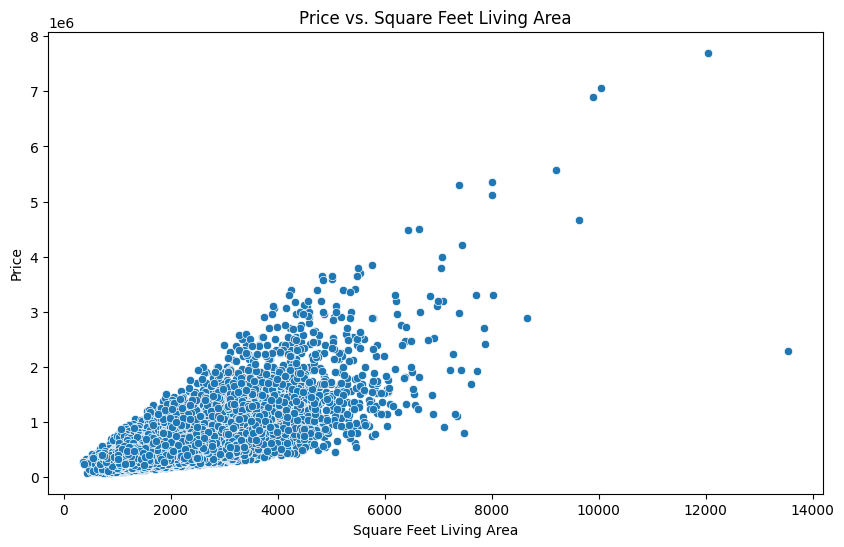

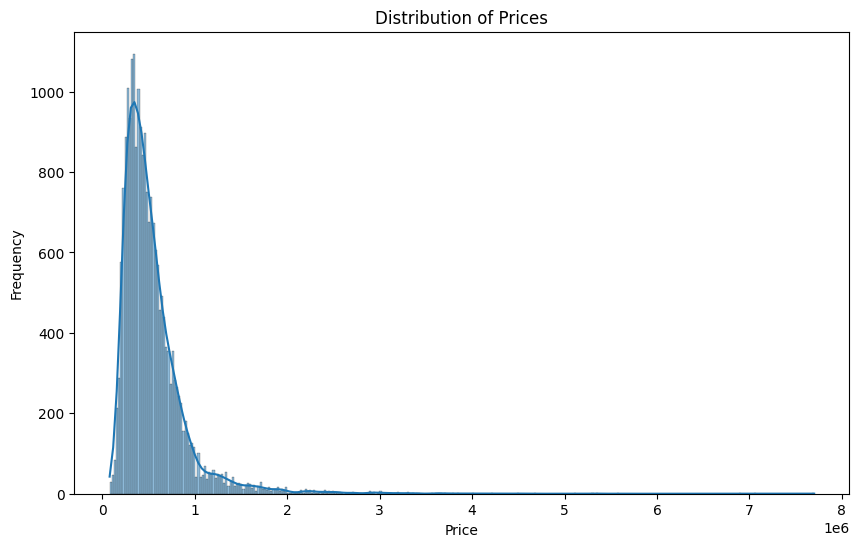

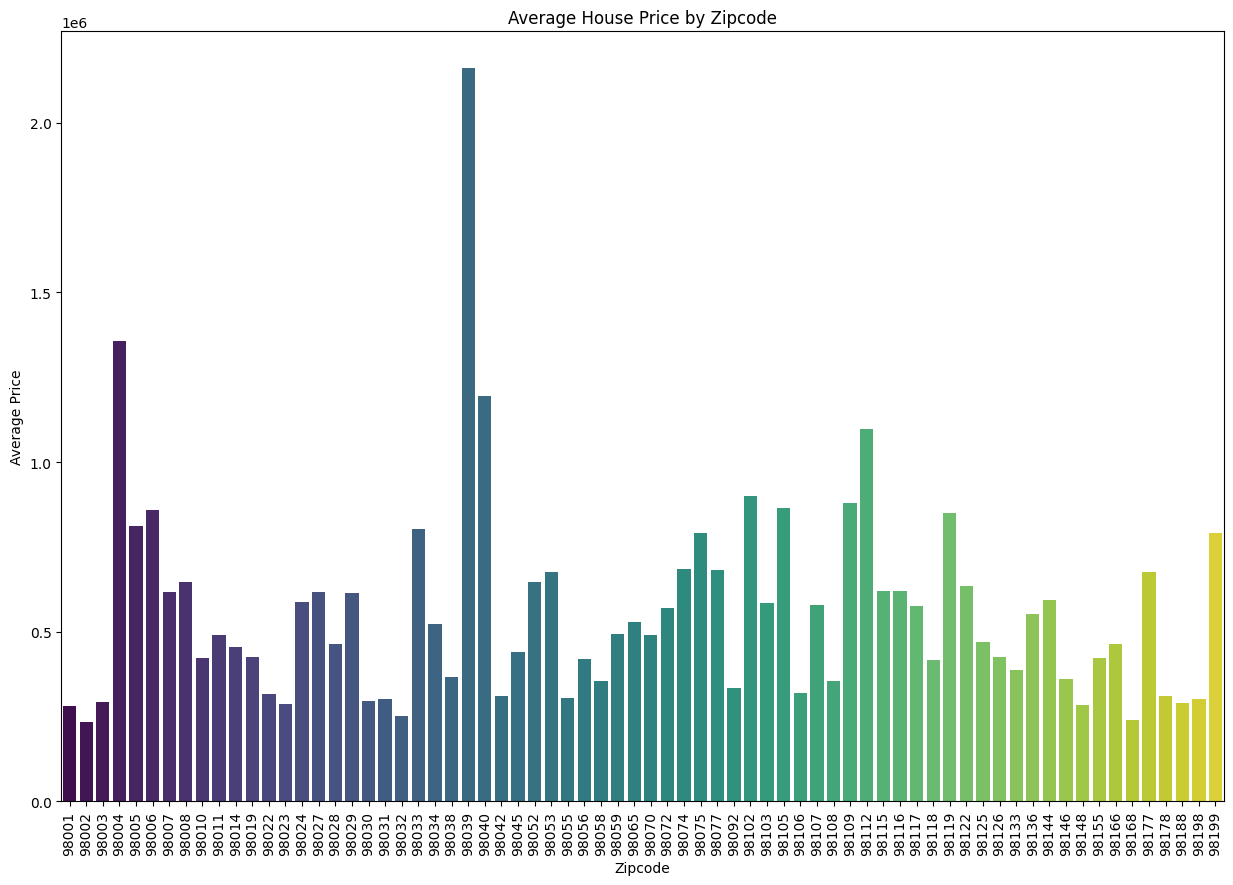

In [48]:
# Insight 1: Correlation between price and sqft_living
# We use a scatter plot to visualize the relationship between price and sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Feet Living Area')
plt.xlabel('Square Feet Living Area')
plt.ylabel('Price')
plt.show()

# Insight 2: Distribution of prices
# We use a histogram to visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Insight 3:Avergahe Houseprice by zipcode
# We use a bar plot to visualize house prices by location

# Group by zipcode and calculate average price
avg_price_by_zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=avg_price_by_zipcode.index, y=avg_price_by_zipcode.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.title('Average House Price by Zipcode')

# Show the plot
plt.show()

In [53]:
#reccommendations for client

# Step 1: Filter houses with 4 or more bathrooms
filtered_df = df[df['bathrooms'] >= 4]

# Step 2: Filter houses with a large lot size
# We will consider the top 10% of houses with the largest lot sizes
lot_size_threshold = df['sqft_lot'].quantile(0.9)
filtered_df = filtered_df[filtered_df['sqft_lot'] >= lot_size_threshold]

# Step 3: Exclude houses with a waterfront
filtered_df = filtered_df[filtered_df['waterfront'] == 0]

# Step 4: Consider houses that are at least 50 years old
# We will subtract 50 from the current year to get the cut-off year
year_threshold = pd.to_datetime('today').year - 50
filtered_df = filtered_df[filtered_df['yr_built'] <= year_threshold]

# Step 5: Sort the houses by price in descending order and select the top 3
recommendations = filtered_df.sort_values(by='price', ascending=False).head(3)

# Display the recommendations
recommendations

,date,id,price,sqft_living,sqft_lot,yr_built,condition,grade,bedrooms,bathrooms,...,waterfront,view,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,6762700020,7700000.000,12050.000,27600.000,1910,4,13,6,8,...,0,3,8570.000,3480.000,19870,98102,47.630,-122.323,3940.000,8800.000
18314,2014-07-11,5317100750,2920000.000,4575.000,24085.000,1926,5,10,4,4,...,0,2,3905.000,670.000,0,98112,47.626,-122.284,3900.000,9687.000
14542,2014-06-11,2303900035,2890000.000,8670.000,64033.000,1965,3,13,5,6,...,0,4,6120.000,2550.000,0,98177,47.730,-122.372,4140.000,81021.000


In [46]:


# Create a map centered around the average latitude and longitude of the three houses
m = folium.Map(location=[(47.6298 + 47.6263 + 47.7295) / 3, (-122.323 + -122.284 + -122.372) / 3], zoom_start=11)

# Add markers for the three houses
folium.Marker([47.6298, -122.323], popup='House ID: 6762700020, Price: $7,700,000').add_to(m)
folium.Marker([47.6263, -122.284], popup='House ID: 5317100750, Price: $2,920,000').add_to(m)
folium.Marker([47.7295, -122.372], popup='House ID: 2303900035, Price: $2,890,000').add_to(m)

# Show the map 
m